## GK Dataset Cleaning and Encoding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"D:/fifa-price-predictor/data/raw/gk_dataset.csv")

In [3]:
df.head(5)

,Unnamed: 0,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,long_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,body_type,release_clause_eur,team_position,joined,contract_valid_until,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,mentality_vision,mentality_penalties,mentality_composure
0,0,6,11,15,14,8,Lionel Andrés Messi Cuccittini,33,170,72,FC Barcelona,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,Messi,138400000.0,CAM,2004-07-01,2021.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",94,91,96,91,94,95,95,75,96
1,1,7,11,15,14,11,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Juventus,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,C. Ronaldo,75900000.0,LS,2018-07-10,2022.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",76,77,92,87,95,71,82,84,95
2,2,87,92,78,90,90,Jan Oblak,27,188,87,Atlético Madrid,1.0,91,93,75000000,125000,GK,Right,3,3,PLAYER_BODY_TYPE_259,159400000.0,GK,2014-07-16,2023.0,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",14,40,30,67,88,49,65,11,68
3,3,15,6,12,8,10,Robert Lewandowski,31,184,80,FC Bayern München,1.0,91,91,80000000,240000,ST,Right,4,4,PLAYER_BODY_TYPE_276,132000000.0,ST,2014-07-01,2023.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",85,70,88,77,93,82,79,88,88
4,4,9,9,15,15,11,Neymar da Silva Santos Júnior,28,175,68,Paris Saint-Germain,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,Neymar,166500000.0,LW,2017-08-03,2022.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",89,81,95,96,91,83,90,92,93


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990 entries, 2 to 18926
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1990 non-null   int64         
 1   goalkeeping_diving        1990 non-null   int64         
 2   goalkeeping_handling      1990 non-null   int64         
 3   goalkeeping_kicking       1990 non-null   int64         
 4   goalkeeping_positioning   1990 non-null   int64         
 5   goalkeeping_reflexes      1990 non-null   int64         
 6   long_name                 1990 non-null   object        
 7   age                       1990 non-null   int64         
 8   height_cm                 1990 non-null   int64         
 9   weight_kg                 1990 non-null   int64         
 10  club_name                 1990 non-null   object        
 11  league_rank               1990 non-null   int64         
 12  overall                 

## Handling Missing Data

In [5]:
df.isna().sum()

Unnamed: 0                      0
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_positioning         0
goalkeeping_reflexes            0
long_name                       0
age                             0
height_cm                       0
weight_kg                       0
club_name                     225
league_rank                   225
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
body_type                       0
release_clause_eur            995
team_position                 225
joined                        983
contract_valid_until          225
physic                       2083
gk_diving                   16861
gk_handling                 16861
gk_kicking                  16861
gk_reflexes   

In [6]:
df = df[df['player_positions'] == 'GK']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2083 entries, 2 to 18926
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2083 non-null   int64  
 1   goalkeeping_diving        2083 non-null   int64  
 2   goalkeeping_handling      2083 non-null   int64  
 3   goalkeeping_kicking       2083 non-null   int64  
 4   goalkeeping_positioning   2083 non-null   int64  
 5   goalkeeping_reflexes      2083 non-null   int64  
 6   long_name                 2083 non-null   object 
 7   age                       2083 non-null   int64  
 8   height_cm                 2083 non-null   int64  
 9   weight_kg                 2083 non-null   int64  
 10  club_name                 2053 non-null   object 
 11  league_rank               2053 non-null   float64
 12  overall                   2083 non-null   int64  
 13  potential                 2083 non-null   int64  
 14  value_eur   

In [8]:
gk_number = (df['player_positions'] == 'GK').sum()
print(gk_number)

2083


In [9]:
df.isna().sum()

Unnamed: 0                     0
goalkeeping_diving             0
goalkeeping_handling           0
goalkeeping_kicking            0
goalkeeping_positioning        0
goalkeeping_reflexes           0
long_name                      0
age                            0
height_cm                      0
weight_kg                      0
club_name                     30
league_rank                   30
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
player_positions               0
preferred_foot                 0
international_reputation       0
weak_foot                      0
body_type                      0
release_clause_eur            93
team_position                 30
joined                        93
contract_valid_until          30
physic                      2083
gk_diving                      0
gk_handling                    0
gk_kicking                     0
gk_reflexes                    0
gk_speed  

In [10]:
mask = (df['release_clause_eur'].isna()) & (df['joined'].isna())
print(mask.sum())

93


In [11]:
mask =(df['club_name'].isna()) & (df['league_rank'].isna())
print(mask.sum())

30


In [12]:
mask = (df['club_name'].isna()) & (df['team_position'].isna())
print(mask.sum())

30


In [13]:
mask = (df['club_name'].isna()) & (df['contract_valid_until'].isna())
print(mask.sum())

30


In [14]:
df = df[df['club_name'].notna()]

In [15]:
df.describe()

,Unnamed: 0,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,release_clause_eur,contract_valid_until,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,mentality_vision,mentality_penalties,mentality_composure
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2.053000e+03,2053.000000,2053.000000,2053.000000,1.990000e+03,2053.000000,0.0,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,10437.478811,65.115928,62.831466,61.674623,63.107160,66.067219,26.193863,188.312226,81.625426,1.350219,64.506576,69.957623,1.686565e+06,6319.288846,1.080370,2.497321,3.197457e+06,2021.880175,NaN,65.115928,62.831466,61.674623,66.067219,37.156357,63.107160,14.003897,26.032148,19.459328,39.395032,58.469070,42.305894,38.710667,18.956162,41.725767
std,5770.505052,7.724181,7.331329,7.581289,8.584701,8.147959,5.489705,4.721114,6.240976,0.723860,7.657227,6.277039,4.761040e+06,15816.006619,0.344646,0.679423,9.453569e+06,1.244975,NaN,7.724181,7.331329,7.581289,8.147959,10.714731,8.584701,4.523707,8.532985,6.112806,11.366451,10.957371,10.849895,12.616864,6.708061,12.968522
min,2.000000,45.000000,43.000000,35.000000,38.000000,44.000000,16.000000,170.000000,64.000000,1.000000,48.000000,48.000000,5.000000e+03,500.000000,1.000000,1.000000,9.000000e+03,2020.000000,NaN,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,5.000000,5.000000,5.000000,14.000000,24.000000,12.000000,9.000000,6.000000,12.000000
25%,5323.000000,60.000000,58.000000,57.000000,57.000000,60.000000,22.000000,185.000000,78.000000,1.000000,59.000000,66.000000,1.500000e+05,700.000000,1.000000,2.000000,2.782500e+05,2021.000000,NaN,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,11.000000,20.000000,15.000000,31.000000,52.000000,34.000000,30.000000,14.000000,31.000000
50%,11052.000000,65.000000,63.000000,61.000000,63.000000,66.000000,26.000000,188.000000,81.000000,1.000000,64.000000,70.000000,4.000000e+05,2000.000000,1.000000,2.000000,6.815000e+05,2022.000000,NaN,65.000000,63.000000,61.000000,66.000000,37.000000,63.000000,13.000000,25.000000,19.000000,37.000000,59.000000,42.000000,38.000000,18.000000,40.000000
75%,15714.000000,70.000000,68.000000,66.000000,69.000000,71.000000,30.000000,191.000000,85.000000,1.000000,70.000000,74.000000,9.250000e+05,5000.000000,1.000000,3.000000,1.700000e+06,2023.000000,NaN,70.000000,68.000000,66.000000,71.000000,45.000000,69.000000,15.000000,30.000000,23.000000,47.000000,66.000000,50.000000,47.000000,23.000000,52.000000
max,18926.000000,90.000000,92.000000,93.000000,91.000000,90.000000,43.000000,206.000000,107.000000,4.000000,91.000000,93.000000,7.500000e+07,260000.000000,5.000000,5.000000,1.594000e+08,2025.000000,NaN,90.000000,92.000000,93.000000,90.000000,65.000000,91.000000,74.000000,67.000000,47.000000,74.000000,88.000000,69.000000,77.000000,70.000000,71.000000


In [16]:
df = df[~(df['club_name'].notna() & df['joined'].isna())]

In [17]:
df['player_traits'] = df['player_traits'].fillna('Unknown')

In [18]:
df.drop('physic', axis= 1, inplace= True)

In [19]:
df.isna().sum()

Unnamed: 0                  0
goalkeeping_diving          0
goalkeeping_handling        0
goalkeeping_kicking         0
goalkeeping_positioning     0
goalkeeping_reflexes        0
long_name                   0
age                         0
height_cm                   0
weight_kg                   0
club_name                   0
league_rank                 0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
body_type                   0
release_clause_eur          0
team_position               0
joined                      0
contract_valid_until        0
gk_diving                   0
gk_handling                 0
gk_kicking                  0
gk_reflexes                 0
gk_speed                    0
gk_positioning              0
player_traits               0
skill_fk_accuracy           0
skill_long

In [27]:
df.dtypes

Unnamed: 0                           int64
goalkeeping_diving                   int64
goalkeeping_handling                 int64
goalkeeping_kicking                  int64
goalkeeping_positioning              int64
goalkeeping_reflexes                 int64
long_name                           object
age                                  int64
height_cm                            int64
weight_kg                            int64
club_name                           object
league_rank                          int64
overall                              int64
potential                            int64
value_eur                            int64
wage_eur                             int64
player_positions                    object
preferred_foot                      object
international_reputation             int64
weak_foot                            int64
body_type                           object
release_clause_eur                 float64
team_position                       object
joined     

In [21]:
df['league_rank'] = df['league_rank'].astype(int)


In [26]:
df['joined'] = pd.to_datetime(df['joined'])

## Outliers and Colleration

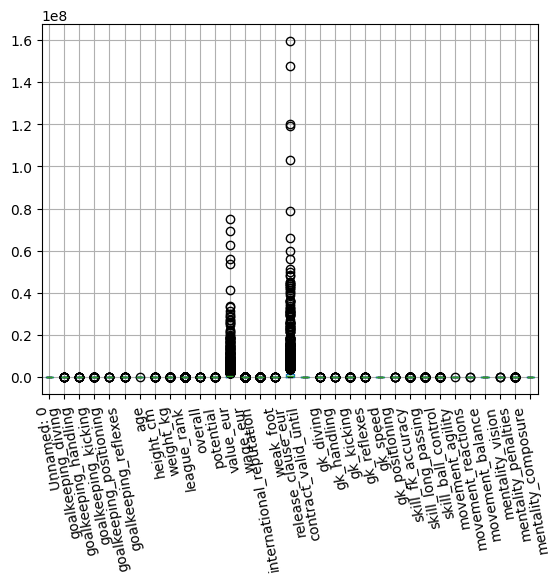

In [30]:
df.boxplot()
plt.xticks(rotation = 100)
plt.show()

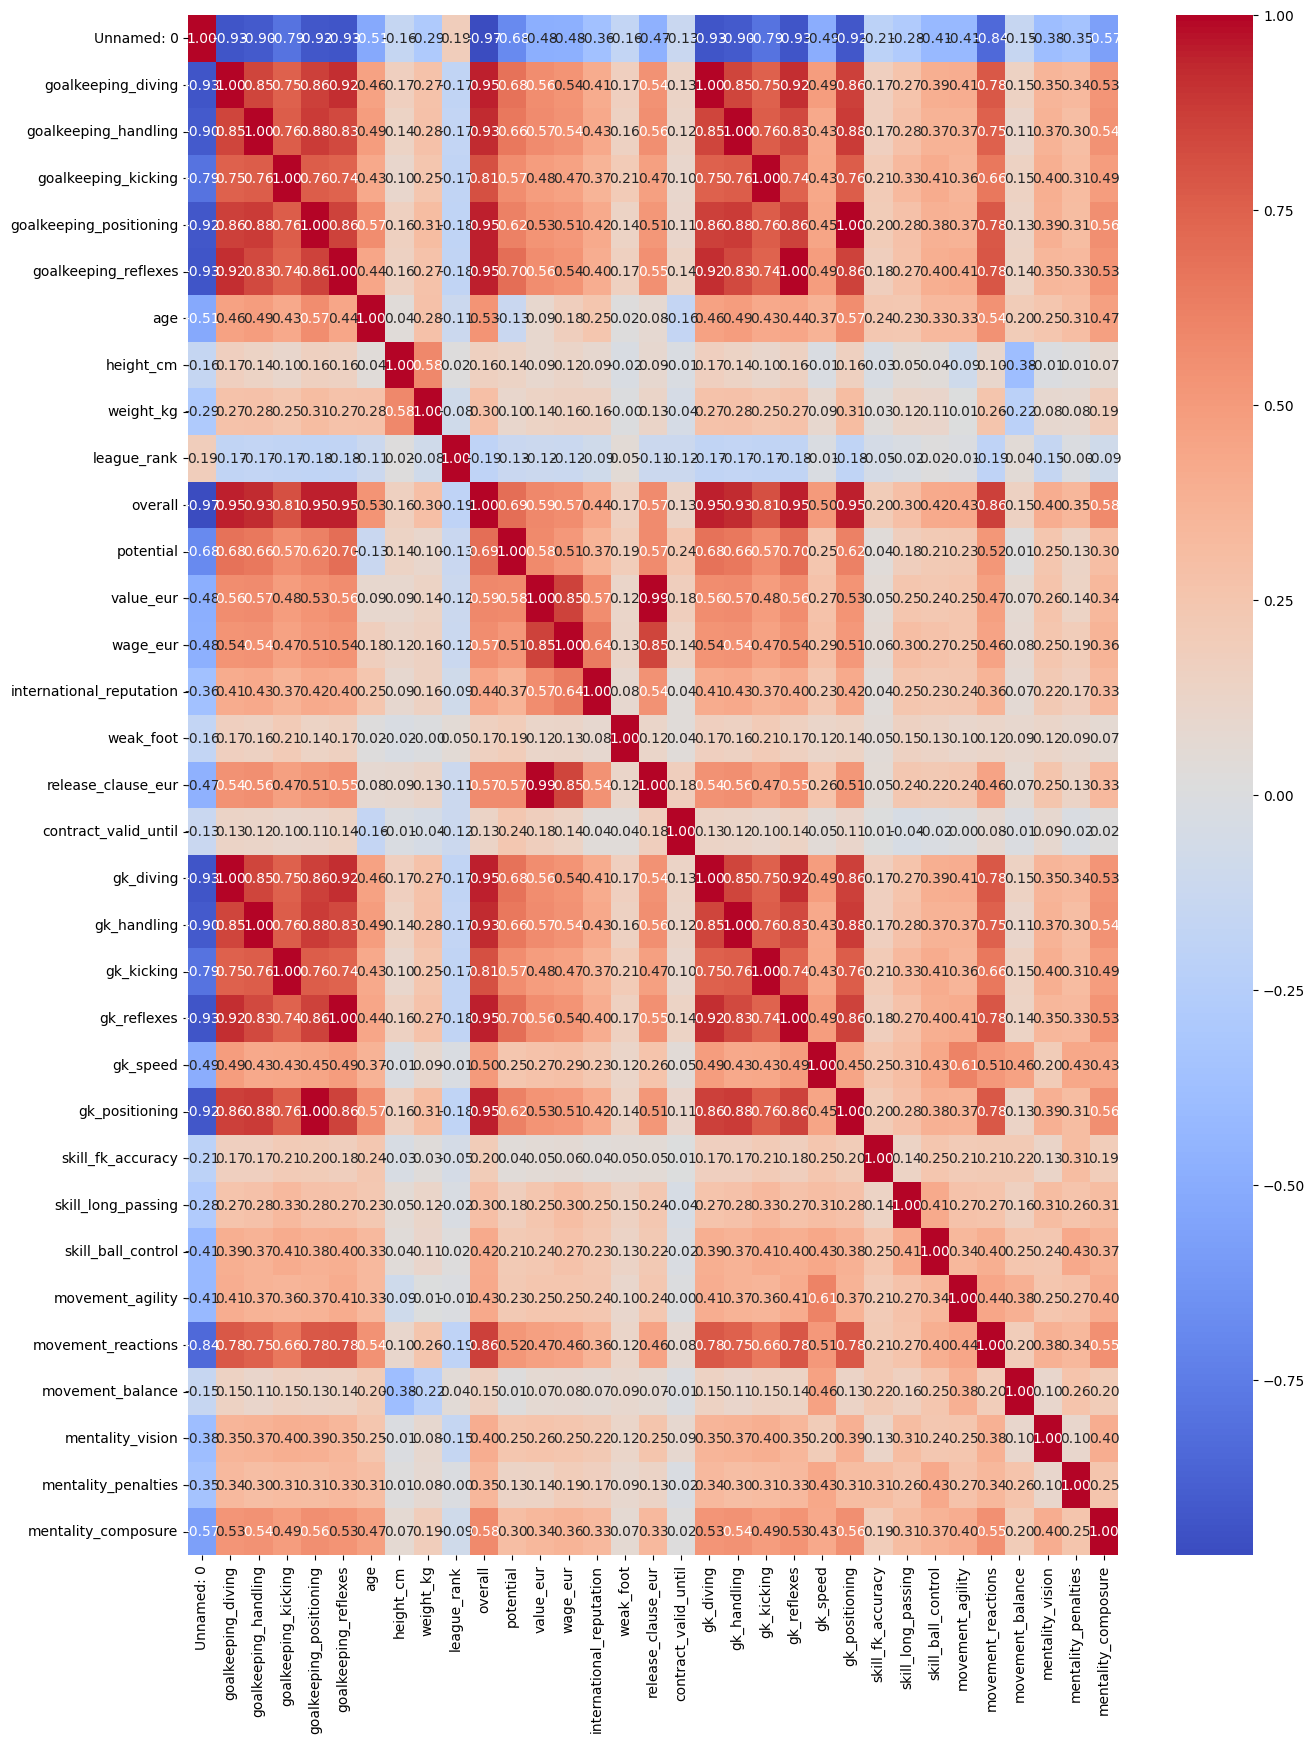

In [39]:
corr = df.select_dtypes(include= 'number').corr()
plt.figure(figsize= (15, 20))
sns.heatmap(corr, annot= True, fmt=".2f", cmap= 'coolwarm')
plt.show()